In [3]:
!pip install --upgrade tables
!pip install eli5

     |████████████████████████████████| 4.3MB 2.8MB/s 
  Found existing installation: tables 3.4.4
    Uninstalling tables-3.4.4:
      Successfully uninstalled tables-3.4.4
     |████████████████████████████████| 112kB 2.7MB/s 


In [0]:
#https://www.youtube.com/watch?v=jUZ8DUaiskQ

import pandas as pd
import numpy as np

#modele - drzewa 
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
#metryka sukcesu
from sklearn.metrics import mean_absolute_error as mea
from sklearn.model_selection import cross_val_score

import eli5
from eli5.sklearn import PermutationImportance

In [8]:
cd "/content/drive/My Drive/Colab Notebooks/DW-Matrix/samochody2020/ML-car-2020-01/"

/content/drive/My Drive/Colab Notebooks/DW-Matrix/samochody2020/ML-car-2020-01


In [40]:
df=pd.read_hdf('./data/car.h5')
df.shape

(106494, 155)

In [10]:
df.columns

Index(['breadcrumb', 'created_at', 'price_currency', 'price_details',
       'price_value', 'seller_address', 'seller_name', 'seller_type',
       'feature_czujniki-parkowania-przednie',
       'feature_poduszka-powietrzna-chroniąca-kolana',
       ...
       'param_pearl', 'param_stan', 'param_wersja', 'param_emisja-co2',
       'param_body-type', 'param_matowy', 'param_bezwypadkowy',
       'param_akryl-(niemetalizowany)', 'param_monthly-payment-value',
       'car_id'],
      dtype='object', length=155)

In [12]:
#prosty model 

#jakie kolumny sa typu number
df.select_dtypes(np.number).columns

Index(['price_value', 'car_id'], dtype='object')

In [19]:
feats = ['car_id']
X = df[feats].values
y = df['price_value'].values

model = DummyRegressor()
model.fit(X,y)
y_pred = model.predict(X)

srednia = mea(y, y_pred) 

print('średnia za zamochód')
srednia

średnia za zamochód


39465.934630440985

In [41]:
#znajdz kolumne zawierajaca slowa price 
[x for x in df.columns if 'price' in x ]

['price_currency', 'price_details', 'price_value']

In [42]:
df['price_currency'].value_counts()

PLN    106290
EUR       204
Name: price_currency, dtype: int64

In [0]:
#mozna euro zamienic na PLN - ale usowamy 
df = df[df['price_currency'] != 'EUR']

In [0]:
df.shape
import sys

In [0]:
#przygotowanie cech - faktoryzacja cech - np id dla colorów
SUFFix_CAT = '__cat'
for feat in df.columns:
  if isinstance(df[feat][0],list): continue
  
  factorized_values = df[feat].factorize()[0]
  if SUFFix_CAT in feat:
    df[feat] = factorized_values
  else:  
    df[feat + SUFFix_CAT] =  factorized_values


In [0]:
cat_feats = [x for x in df.columns if SUFFix_CAT in x ]
cat_feats = [x for x in cat_feats if 'price' not in x ] #usuwamy slowo price 

In [46]:
len(cat_feats)

151

In [47]:
X = df[cat_feats].values
y = df['price_value'].values

#model = DecisionTreeRegressor(max_depth=5, criterion=, random_state=)
model = DecisionTreeRegressor(max_depth=5)
scores = cross_val_score(model, X, y, cv=3, scoring='neg_mean_absolute_error') # otrzymamy wartosc ujemna
np.mean(scores)


-19566.588937368328

In [50]:
#wybiereamy cech warte uwagie 
m = DecisionTreeRegressor(max_depth=5)
m.fit(X,y)

imp = PermutationImportance(m, random_state=0).fit(X,y)
eli5.show_weights(imp, feature_names=cat_feats)


Weight,Feature
0.2533 ± 0.0040,param_napęd__cat
0.2008 ± 0.0047,param_faktura-vat__cat
0.1943 ± 0.0088,param_stan__cat
0.1423 ± 0.0086,param_rok-produkcji__cat
0.0629 ± 0.0047,param_moc__cat
0.0424 ± 0.0014,feature_kamera-cofania__cat
0.0412 ± 0.0008,param_skrzynia-biegów__cat
0.0286 ± 0.0037,param_marka-pojazdu__cat
0.0191 ± 0.0022,param_pojemność-skokowa__cat
0.0163 ± 0.0005,feature_bluetooth__cat


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

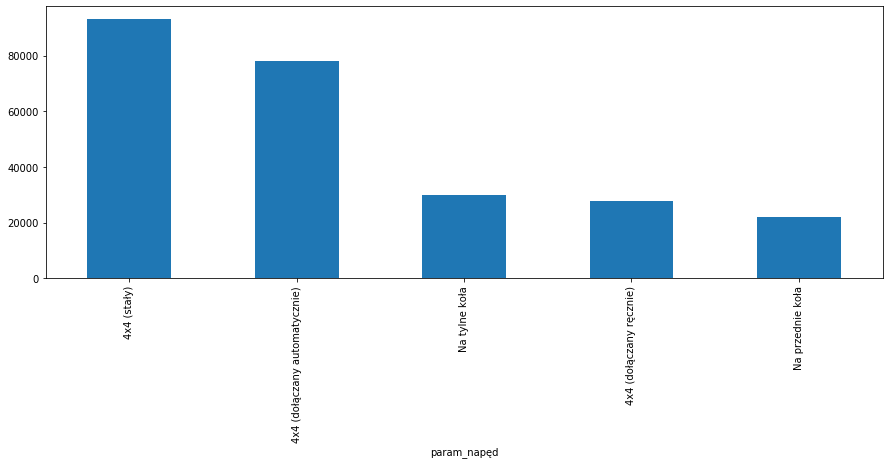

In [61]:
(
 df
 .groupby('param_napęd')['price_value']
 #.agg(np.mean)  #średnia 
 .agg(np.median) # mediana  
 .sort_values(ascending=False)
 .head(50)
).plot(kind='bar', figsize=(15,5))